- ### SVM, Logistic regression, AUC-ROC, AUC_PR 
- ### methods of transformation of variables 
- ### methods of selection of features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
import warnings
import time
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

C:\Users\krup1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# SVM, LR, calibration of probabilities

–°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ.

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

- #### –û–±—É—á–∏–º –º–µ—Ç–æ–¥ –æ—Ä–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤
- #### –ü–æ–¥–±–µ—Ä–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è AUC-PR

In [5]:
#–ø–æ–¥—Å—á–µ—Ç AUC-PR
def auc_pr(y_test, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    return auc(recall, precision)

In [6]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)

#–æ–±—É—á–∞—é—â–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#–≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [7]:
#–ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –° (–ø–æ–¥–±–∏—Ä–∞–µ—Ç—Å—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏)
def c_best_selection (C_set, clf, X_t, y_t, X_val, y_val):
    auc_p_r = 0
    C = 1.0
    
    for C_i in C_set:
        clf.C = C_i

        clf.fit(X_t, y_t)
        a_x = clf.predict(X_val)

        #–≤—ã—á–∏—Å–ª—è–µ–º precision –∏ recall
        precision, recall, thresholds = precision_recall_curve(y_val, a_x)
        #—Å—á–∏—Ç–∞–µ–º –ø–ª–æ—â–∞–¥—å –ø–æ–¥ –∫—Ä–∏–≤—ã–º–∏ precision –∏ recall
        auc_precision_recall = auc(recall, precision)

        if auc_precision_recall > auc_p_r:
            auc_p_r = auc_precision_recall
            C = C_i
    print("–ü–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä –° =", C)
    return C

In [8]:
best_c_linearSVC = c_best_selection(list(np.logspace(-20, 30, 100)), LinearSVC(), X_train1, y_train1, X_val, y_val)

–ü–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä –° = 68926121043497.375


–ù–∞ —Ç–µ—Å—Ç–æ–≤–æ–π —á–∞—Å—Ç–∏ –ø–æ—Å—Ç–æ—Ä–∏–º ROC –∏ PR –∫—Ä–∏–≤—ã–µ, –ø–æ—Å—á–∏—Ç–µ–º AUC-ROC, AUC-PR.


–°—Ä–∞–≤–Ω–∏–º AUC-ROC –∏ AUC-PR —Å —ç—Ç–∏–º–∏ –∂–µ –º–µ—Ç—Ä–∏–∫–∞–º–∏ –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞.

### –°—á–∏—Ç–∞–µ–º

In [9]:
#–∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä C, –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å, —Å–¥–µ–ª–∞–µ–º –ø—Ä–æ–≥–Ω–æ–∑
clf = LinearSVC()
clf.C = best_c_linearSVC
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

In [10]:
#–ø–æ—Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ 
precision, recall, thresholds_pr = precision_recall_curve(y_test, a_x)
fpr, tpr, thresholds_roc = roc_curve(y_test, a_x)

In [11]:
#—Å—á–∏—Ç–∞–µ–º AUC-ROC, AUC-PR —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ 5 –∑–Ω–∞–∫–æ–≤
print ("AUC-ROC : %0.5f" % auc(fpr, tpr))
print ("AUC-PR : %0.5f" % auc(recall, precision))

AUC-ROC : 0.74897
AUC-PR : 0.81456


### –°—Ç—Ä–æ–∏–º

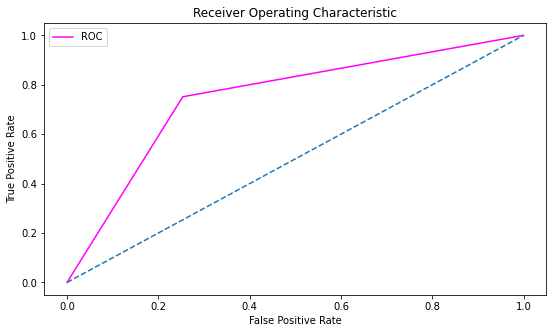

In [12]:
plt.figure(figsize=(9, 5))

plt.plot(fpr, tpr, color='magenta', label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

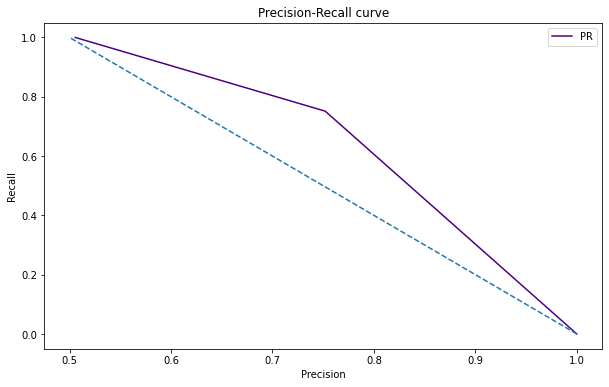

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(precision, recall, color='indigo', label='PR')
plt.plot([1, 0.5], [0, 1], linestyle='--')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

### –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º

**–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –ø—Ä–æ–≥–Ω–æ–∑—ã –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ –ª—É—á—à–µ, —á–µ–º –ø—Ä–æ–≥–Ω–æ–∑—ã —Å–ª—É—á–∞–π–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞. –≠—Ç–æ –ª–µ–≥–∫–æ –ø–æ–Ω—è—Ç—å, –ø–æ—Ç–æ–º—É —á—Ç–æ ROC –∏ PR –∫—Ä–∏–≤—ã–µ –ª–µ–∂–∞—Ç –≤—ã—à–µ –¥–∏–∞–≥–æ–Ω–∞–ª–∏.**

### –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–∞—á–µ—Ç–≤–æ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å —Ç–µ–º –∂–µ –Ω–∞–±–æ—Ä–æ–º –¥–µ–π—Å—Ç–≤–∏–π

In [14]:
best_c_LR = c_best_selection(list(np.logspace(-20, 30, 100)), LogisticRegression(), X_train1, y_train1, X_val, y_val)

–ü–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä –° = 0.015199110829529393


In [15]:
#–∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä C, –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å, —Å–¥–µ–ª–∞–µ–º –ø—Ä–æ–≥–Ω–æ–∑
clf = LogisticRegression()
clf.C = best_c_LR
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

#–ø–æ—Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ 
precision, recall, thresholds_pr = precision_recall_curve(y_test, a_x)
fpr, tpr, thresholds_roc = roc_curve(y_test, a_x)

#—Å—á–∏—Ç–∞–µ–º AUC-ROC, AUC-PR —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ 5 –∑–Ω–∞–∫–æ–≤
print ("AUC-ROC : %0.5f" % auc(fpr, tpr))
print ("AUC-PR : %0.5f" % auc(recall, precision))

AUC-ROC : 0.77101
AUC-PR : 0.83092


### –°—Ç—Ä–æ–∏–º

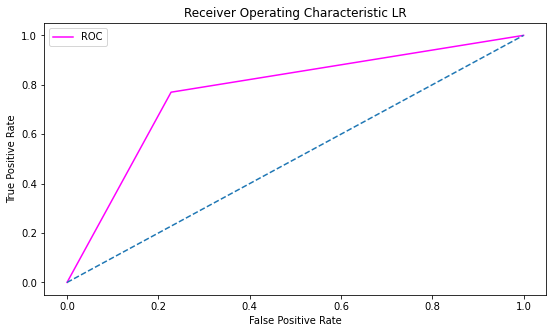

In [16]:
plt.figure(figsize=(9, 5))

plt.plot(fpr, tpr, color='magenta', label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic LR')
plt.legend()
plt.show()

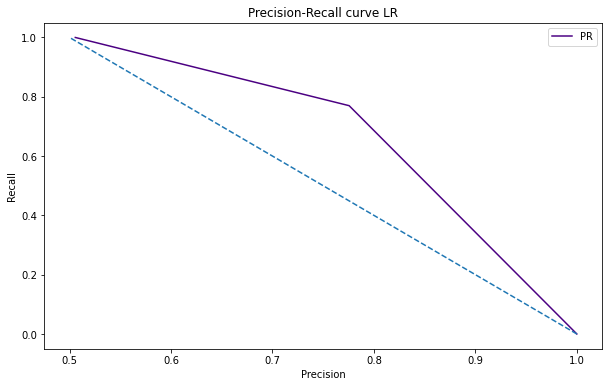

In [17]:
plt.figure(figsize=(10, 6))

plt.plot(precision, recall, color='indigo', label='PR')
plt.plot([1, 0.5], [0, 1], linestyle='--')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall curve LR')
plt.legend()
plt.show()

### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ LR –∏ SVM

### –ó–∞–º–µ—Ç–∏–º, —á—Ç–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–ª—É—á–∏–ª–∏—Å—å –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏.

**–ù–∞ –º–æ–π –≤–∑–≥–ª—è–¥, –æ–Ω–∏ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ LR –∏ SVM –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Ä–∞–∑–Ω—ã–µ –ø—Ä–∏–Ω—Ü–∏–ø—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, —Ç.–µ. –≤ –æ—Å–Ω–æ–≤–µ LR –ª–µ–∂–∏—Ç —Ç–µ–æ—Ä–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π (–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –≤—ã–±–æ—Ä–∫–∞ —Ä–∞–≤–Ω–∞ 1, –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ —Å–∏–≥–º–æ–∏–¥–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π, –∞ –∑–∞—Ç–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è –º–µ—Ç–æ–¥–æ–º –æ—Ü–µ–Ω–∫–∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è), –∞ –≤ SVM –º–∞–∫—Å–∏–º–∏–∑–∞—Ü–∏–∏ –≥–µ–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ (–ø–ª–æ—Å–∫–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –≥–µ–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º —Å—á–∏—Ç–∞–µ—Ç—Å—è –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π –ø–ª–æ—Å–∫–æ—Å—Ç—å—é –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏).**

**–ï—â–µ –≤–∏–¥–∏–º, —á—Ç–æ LR —Å—Ä–∞–±–æ—Ç–∞–ª–æ —á—É—Ç—å –ø–æ—Ö—É–∂–µ, —ç—Ç–æ –ø–æ–Ω—è—Ç–Ω–æ, —Ç–∞–∫ –∫–∞–∫ –æ—Ç –Ω–µ–µ –º—ã —Ç—Ä–µ–±—É–µ–º —Ç–æ—á–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, SVM —Å—Ä–∞–±–æ—Ç–∞–ª –ø–æ–ª—É—á—à–µ, —Ç–∞–∫ –∫–∞–∫ –∑–¥–µ—Å—å –≥–ª–∞–≤–Ω–∞—è –∑–∞–¥–∞—á–∞ —Ö–æ—Ä–æ—à–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –æ–±—ä–µ–∫—Ç—ã (–±–µ–∑ –æ—à–∏–±–æ–∫), –Ω–µ –≥–æ–≤–æ—Ä—è –æ —Å—Ç–µ–ø–µ–Ω–∏ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –≤ –∫–ª–∞—Å—Å–µ.**


### –ö–∞–ª–∏–±—Ä–æ–≤–∫–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π.

–ü–µ—Ä–µ–π–¥—ë–º –∫ –æ—Ü–µ–Ω–∫–µ –∫–∞—á–µ—Å—Ç–≤–∞ –≤—ã–¥–∞–≤–∞–µ–º—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π. –ù–∞—á–Ω—ë–º —Å –∫–∞–ª–∏–±—Ä–æ–≤–æ—á–Ω—ã—Ö –∫—Ä–∏–≤—ã—Ö. 

In [23]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) 
        bin_real_ratios.append(np.sum(y_test[(preds >= l) & (preds < r)] == 1) / len(y_test[(preds >= l) & (preds < r)])) 
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()

### –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ

In [24]:
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X = scl.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### –û–±—É—á–∞–µ–º —Ç–µ—Å—Ç–∏—Ä—É–µ–º –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, —Å—Ç—Ä–æ–∏–º –∫–æ–ª–∏–±—Ä–æ–≤–æ—á–Ω—É—é –∫—Ä–∏–≤—É—é

Text(0.5, 1.0, '–°alibration curve LR')

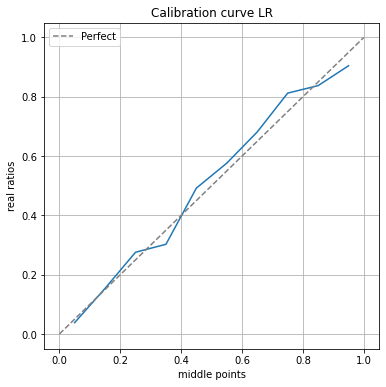

In [25]:
clf = LogisticRegression()
clf.probability = True
clf.fit(X_train, y_train)
lr_pred = clf.predict_proba(X_test)[:, 1]

plot_calibration_curve(y_test, lr_pred)
plt.plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='grey')
plt.legend()

plt.xlabel('middle points')
plt.ylabel('real ratios')
plt.title('–°alibration curve LR')

### –û–±—É—á–∞–µ–º —Ç–µ—Å—Ç–∏—Ä—É–µ–º –º–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤, —Å—Ç—Ä–æ–∏–º –∫–æ–ª–∏–±—Ä–æ–≤–æ—á–Ω—É—é –∫—Ä–∏–≤—É—é

Text(0.5, 1.0, '–°alibration curve SVC')

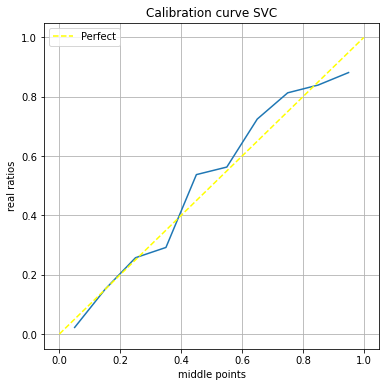

In [26]:
clf = SVC(kernel='linear')
clf.probability = True
clf.fit(X_train, y_train)
svc_pred = clf.predict_proba(X_test)[:, 1]

plot_calibration_curve(y_test, svc_pred)
plt.plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='yellow')
plt.legend()

plt.xlabel('middle points')
plt.ylabel('real ratios')
plt.title('–°alibration curve SVC')

**–°–º–æ—Ç—Ä—è –Ω–∞ –∫–∞–ª–∏–±—Ä–æ–≤–æ—á–Ω—ã–µ –∫—Ä–∏–≤—ã–µ, –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ LR —Å–ø—Ä–∞–≤–∏–ª–∞—Å—å —á—É—Ç—å –ª—É—á—à–µ. –ù–æ –≤–æ–æ–±—â–µ —Å–∏–ª—å–Ω—ã—Ö –æ—Ç–ª–∏—á–∏–π –Ω–µ –≤–∏–¥–Ω–æ.**

### –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–≤–µ—Ç–æ–≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤ 

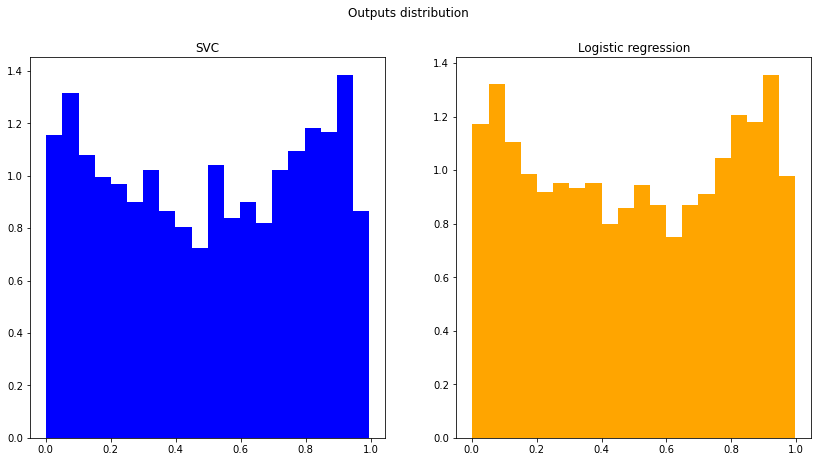

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].hist(svc_pred, bins=20, color='blue', density='True')
axs[1].hist(lr_pred, bins=20, color='orange', density='True')

axs[0].set_title('SVC')
axs[1].set_title('Logistic regression')

plt.suptitle('Outputs distribution')
plt.show()

**–ü—Ä–æ –æ—Ç–ª–∏—á–∏—è —Ç—Ä—É–¥–Ω–æ —á—Ç–æ-—Ç–æ —Å–∫–∞–∑–∞—Ç—å, —Ç–∞–∫ –∫–∞–∫, —Å–º–æ—Ç—Ä—è –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∏, –∏—Ö –ø–æ—á—Ç–∏ –Ω–µ –≤–∏–¥–Ω–æ. –ù–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –µ—Å—Ç—å, –º–æ–≥—É –æ–±—ä—è—Å–Ω–∏—Ç—å —ç—Ç–æ —Ç–µ–º, —á—Ç–æ LR –∏ SVM –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Ä–∞–∑–Ω—ã–µ –ø—Ä–∏–Ω—Ü–∏–ø—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∫–∞–∫ –±—ã–ª–æ –æ–ø–∏—Å–∞–Ω–æ –≤—ã—à–µ.**

–í–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å `CalibratedClassifierCV` –∏–∑ `sklearn` –¥–ª—è –∫–∞–ª–∏–±—Ä–æ–≤–∫–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –º–µ—Ç–æ–¥–∞ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –Ω–∞ –æ–±—É—á–µ–Ω–∏–∏ –∏ –ø–æ—Å—Ç—Ä–æ–π—Ç–µ —Å –µ–≥–æ –ø–æ–º–æ—â—å—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏. –ù–∞—Ä–∏—Å—É–π—Ç–µ –¥–ª—è –Ω–∏—Ö –∫–∞–ª–∏–±—Ä–æ–≤–æ—á–Ω—É—é –∫—Ä–∏–≤—É—é. –£–ª—É—á—à–∏–ª–∞—Å—å –ª–∏ –æ–Ω–∞?

–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è CalibratedClassifierCV –∏–∑ sklearn –¥–ª—è –∫–∞–ª–∏–±—Ä–æ–≤–∫–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –º–µ—Ç–æ–¥–∞ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –Ω–∞ –æ–±—É—á–µ–Ω–∏–∏, –ø–æ—Å—Ç—Ä–æ–∏–º —Å –µ–≥–æ –ø–æ–º–æ—â—å—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏. –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–∞–ª–∏–±—Ä–æ–≤–æ—á–Ω—É—é –∫—Ä–∏–≤—É—é.

### –û–±—É—á–∞–µ–º, —Ç–µ—Å—Ç–∏—Ä—É–µ–º –∏ —Å—Ç—Ä–æ–∏–º

Text(0.5, 1.0, '–°alibration curve SVC (CalibratedClassifierCV)')

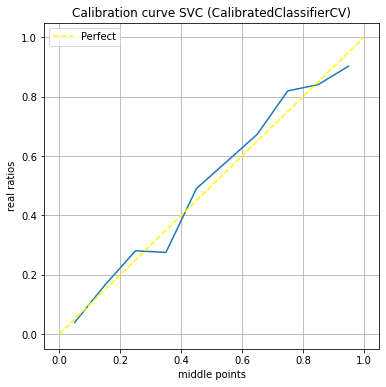

In [28]:
clf = CalibratedClassifierCV()
clf.probability = True
clf.fit(X_train, y_train)
ccl_pred = clf.predict_proba(X_test)[:, 1]

plot_calibration_curve(y_test, ccl_pred)
plt.plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='yellow')
plt.legend()

plt.xlabel('middle points')
plt.ylabel('real ratios')
plt.title('–°alibration curve SVC (CalibratedClassifierCV)')

**–ö–∞–∂–µ—Ç—Å—è, —á—Ç–æ –∫–∞–ª–∏–±—Ä–æ–≤–æ—á–Ω–∞—è –∫—Ä–∏–≤–∞—è —Å—Ç–∞–ª–∞ –ª—É—á—à–µ, —Ç.–µ. –æ—Ç–∫–ª–æ–Ω—è—Ç—å—Å—è –æ—Ç –∏–¥–µ–∞–ª–∞ –æ–Ω–∞ —Å—Ç–∞–ª–∞ –º–µ–Ω—å—à–µ.**

# –†–∞–±–æ—Ç–∞–µ–º —Å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–≤–∞ –æ—Å–Ω–æ–≤–Ω—ã—Ö —Å–ø–æ—Å–æ–±–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:
- One-hot-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
- CTR, mean-target –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ ‚Äî –∫–∞–∂–¥—ã–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –∑–∞–º–µ–Ω—è–µ—Ç—Å—è –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–æ –≤—Å–µ–º –æ–±—ä–µ–∫—Ç–∞–º, –∏–º–µ—é—â–∏–º –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —ç—Ç–æ–º –ø—Ä–∏–∑–Ω–∞–∫–µ.

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). 

In [30]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip
df = pd.read_csv('bank-additional-full.csv', sep=';')

"wget" ¬≠“ê –ø—û¬´–ø“ê–≤–±–ø —û¬≠–≥–≤–∞“ê¬≠¬≠“ê¬© –Å¬´–Å —û¬≠“ê–∏¬≠“ê¬©
–Ñ¬Æ¬¨¬†¬≠¬§¬Æ¬©, –Å–±–á¬Æ¬´¬≠–ø“ê¬¨¬Æ¬© –á–∞¬Æ–à–∞¬†¬¨¬¨¬Æ¬© –Å¬´–Å –á¬†–Ñ“ê–≤¬≠–ª¬¨ –¥¬†¬©¬´¬Æ¬¨.
"unzip" ¬≠“ê –ø—û¬´–ø“ê–≤–±–ø —û¬≠–≥–≤–∞“ê¬≠¬≠“ê¬© –Å¬´–Å —û¬≠“ê–∏¬≠“ê¬©
–Ñ¬Æ¬¨¬†¬≠¬§¬Æ¬©, –Å–±–á¬Æ¬´¬≠–ø“ê¬¨¬Æ¬© –á–∞¬Æ–à–∞¬†¬¨¬¨¬Æ¬© –Å¬´–Å –á¬†–Ñ“ê–≤¬≠–ª¬¨ –¥¬†¬©¬´¬Æ¬¨.


In [31]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

**–ï—Å–ª–∏ –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π —Å—Ç–æ–ª–±–µ—Ü, —Ç–æ –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å, —á—Ç–æ –æ–Ω –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è 'y' –∏ —Å–æ–¥–µ—Ä–∂–∏—Ç –∑–Ω–∞—á–µ–Ω–∏—è: 'no', 'yes'. –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –æ—Ç–¥–µ–ª—å–Ω–æ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é 1- 'yes', 0 - 'no'.**

In [32]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [33]:
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1

In [34]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0           1.1          93.994          -36.4      4.857       5191.0  1  
1           1.1          93.994          -36.4      4.857       5191.0  1  
2           1.1          93.994          -36.4      4.857       5191.0  1  
3           1.1          93.994          -36.4      4.857       5191.0  1  
4           1.1          93.994          -36.4      4.857       5191.0  1

**–í –æ–ø–∏—Å–∞–Ω–∏–∏ –¥–∞–Ω—ã—Ö –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ —Å–ª–µ–¥—É—é—â–µ–µ: 'duration' —Å–∏–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–ª—å –≤—ã–≤–æ–¥–∞. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—ã–∑–æ–≤–∞ –¥–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –≤—ã–∑–æ–≤–∞ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–∞. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –ø–æ—Å–ª–µ –æ–∫–æ–Ω—á–∞–Ω–∏—è –∑–≤–æ–Ω–∫–∞, –æ—á–µ–≤–∏–¥–Ω–æ, –∏–∑–≤–µ—Å—Ç–Ω–æ y. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —ç—Ç–∏ –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–ª–µ–¥—É–µ—Ç –≤–∫–ª—é—á–∞—Ç—å —Ç–æ–ª—å–∫–æ –¥–ª—è —Ü–µ–ª–µ–π —ç—Ç–∞–ª–æ–Ω–Ω–æ–≥–æ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –æ—Ç –Ω–∏—Ö —Å–ª–µ–¥—É–µ—Ç –æ—Ç–∫–∞–∑–∞—Ç—å—Å—è, –µ—Å–ª–∏ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è –ø–æ–ª—É—á–∏—Ç—å —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω—É—é –ø—Ä–æ–≥–Ω–æ—Å—Ç–∏—á–µ—Å–∫—É—é –º–æ–¥–µ–ª—å.**

In [35]:
df.drop(columns='duration', inplace=True)

üõë **–†–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É –ø–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º, –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è** üõë

–†–ê–°–°–£–ñ–î–ï–ù–ò–Ø

**–ù–∞—à–∞ –∑–∞–¥–∞—á–∞ —Å–æ—Å—Ç–æ–∏—Ç –≤ —Ç–æ–º, —á—Ç–æ–±—ã –ø—Ä–∏–≤–ª–µ—á—å –∫–∞–∫ –º–æ–∂–Ω–æ –±–æ–ª—å—à–µ –∫–ª–∏–µ–Ω—Ç–æ–≤, —Ç–æ –µ—Å—Ç—å –º—ã –¥–æ–ª–∂–Ω—ã –±–æ–ª—å—à–µ –¥—É–º–∞—Ç—å –æ —Ç–æ–º, –∫–∞–∫ –±—ã –Ω–µ –ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –æ–±—ä–µ–∫—Ç. –í—ã–±–∏—Ä–∞–µ–º AUC-PR, —Ç–∞–∫ –∫–∞–∫ PR AUC —Å–º–æ—Ç—Ä–∏—Ç –Ω–∞ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é –ø—Ä–æ–≥–Ω–æ—Å—Ç–∏—á–µ—Å–∫—É—é —Ü–µ–Ω–Ω–æ—Å—Ç—å –∏ –∏—Å—Ç–∏–Ω–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å. –ê –≤–æ—Ç AUC-ROC, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Å–º–æ—Ç—Ä–∏—Ç –Ω–∞ –∏—Å—Ç–∏–Ω–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å TPR –∏ –ª–æ–∂–Ω–æ–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å FPR.**

### –†–∞–∑–¥–µ–ª–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∏ –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ

In [36]:
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

num = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∫ –æ–±—É—á–µ–Ω–∏—é –º–æ–¥–µ–ª–∏

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
#–¥–ª—è –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏—Å–ø–æ–ª—å–∑—É–µ–º OrdinalEncoder
enc = OrdinalEncoder()

In [39]:
#–≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫–∂–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º
date = ColumnTransformer([
                     ('cat', enc, cat),
                     ('num', StandardScaler(), num)
                     ])


#—Å–æ–∑–¥–∞–¥–∏–º –ø–∞–π–ø–ª–∞–π–Ω —Å LogisticRegression —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–º –¥–∞–Ω–Ω—ã—Ö 
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', date),
                   ('classifier', LogisticRegression())
                   ])

### –ü–µ—Ä–µ—Ö–æ–¥–∏–º –∫ –æ–±—É—á–µ–Ω–∏—é 

In [40]:
#—Ä–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'y'), 
                                                    df['y'], test_size=0.3, random_state=777, stratify = df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [41]:
start_time = time.time()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ø—Ä–∏ OrdinalEncoder:', time.time() - start_time)
print("AUC-PR –ø—Ä–∏ OrdinalEncoder = %.5f" % auc_pr(y_test, y_pred))
print('–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ ', date.fit_transform(X_train).shape[1])

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ø—Ä–∏ OrdinalEncoder: 0.4340336322784424
AUC-PR –ø—Ä–∏ OrdinalEncoder = 0.95330
–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤  19


- –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–º–æ—â—å—é one-hot-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è. 
- –û–±—É—á–∏–º –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∏–∑–º–µ–Ω–∏–Ω–∏—è –≤ –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏. 
- –ò–∑–º–µ—Ä–∏–º –≤—Ä–µ–º—è, –ø–æ—Ç—Ä–µ–±–æ–≤–∞–≤—à–µ–µ—Å—è –Ω–∞ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏.

In [42]:
#–¥–ª—è –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏—Å–ø–æ–ª—å–∑—É–µ–º OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")

#–≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫–∂–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º
date = ColumnTransformer([
                     ('cat', enc, cat),
                     ('num', StandardScaler(), num)
                     ])


#—Å–æ–∑–¥–∞–¥–∏–º –ø–∞–π–ø–ª–∞–π–Ω —Å LogisticRegression —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–º –¥–∞–Ω–Ω—ã—Ö 
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', date),
                   ('classifier', LogisticRegression())
                   ])

In [43]:
start_time = time.time()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR –ø—Ä–∏ OneHotEncoder = %.5f" %  auc_pr(y_test, y_pred))
print('–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ ', date.fit_transform(X_train).shape[1])

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.7325587272644043
AUC-PR –ø—Ä–∏ OneHotEncoder = 0.95339
–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤  62


### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ OrdinalEncoder –∏ OneHotEncoder

- OneHotEncoder —Ä–∞–±–æ—Ç–∞–ª –ø–æ—á—Ç–∏ –≤ –¥–≤–∞ —Ä–∞–∑–∞ –¥–æ–ª—å—à–µ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ 
- –ü–æ –∫–∞—á–µ—Å—Ç–≤—É –ø–æ—á—Ç–∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ (ohe –Ω–∞ 0, 00009 –ª—É—á—à–µ)

### mean-target encoding 


–û—Å–Ω–æ–≤–Ω–∞—è –∏–¥–µ—è –≤ —Ç–æ–º, —á—Ç–æ –Ω–∞–º –≤–∞–∂–Ω—ã –Ω–µ —Å–∞–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –∞ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –∫–æ—Ç–æ—Ä—ã–µ –∏–º–µ—é—Ç –æ–±—ä–µ–∫—Ç—ã —ç—Ç–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏. –ö–∞–∂–¥—ã–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –º—ã –∑–∞–º–µ–Ω–∏–º —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–æ –≤—Å–µ–º –æ–±—ä–µ–∫—Ç–∞–º —ç—Ç–æ–π –∂–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

- –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é —Å—á—ë—Ç—á–∏–∫–æ–≤ 
- –û–±—É—á–∏–º –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ
- –°—Ä–∞–≤–Ω–∏–º –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–º–∏

In [44]:
#–≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫–∂–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º, –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –æ—Ç–¥–µ–ª—å–Ω–æ
date = ColumnTransformer([
                     ('cat', 'passthrough', cat),
                     ('num', StandardScaler(), num)
                     ])


#—Å–æ–∑–¥–∞–¥–∏–º –ø–∞–π–ø–ª–∞–π–Ω —Å LogisticRegression —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–º –¥–∞–Ω–Ω—ã—Ö 
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', date),
                   ('classifier', LogisticRegression())
                   ])

### –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö, –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ

In [45]:
start_time = time.time()

#–ø–µ—Ä–µ—Ö–æ–¥–∏–º –∫ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—é. –ë—É–¥–µ–º –∏–¥—Ç–∏ –ø–æ –∫–∞–∂–¥–æ–º—É –∏–∑ —Å—Ç–æ–ª–±—Ü–æ–≤ –≤–Ω—É—Ç—Ä–∏ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏.
for col in cat:
    for categ in list(pd.unique(X_train[col])):
        #–∏—Å–ø–æ–ª—å–∑—É–µ–º —Ñ–æ—Ä–º—É–ª—É
        g_train = X_train[(X_train[col] == categ) & (y_train == 1)].shape[0] / X_train[X_train[col] == categ].shape[0]
        X_train.loc[X_train[col] == categ, col] = g_train
        
        
        g_test = X_test[(X_test[col] == categ) & (y_test == 1)].shape[0] / X_test[X_test[col] == categ].shape[0]
        X_test.loc[X_test[col] == categ, col] = g_test 

#–æ–±—É—á–µ–Ω–∏–µ, —Ç–µ—Å—Ç–∏—Ä–æ–≤–Ω–∏–µ        
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR –ø—Ä–∏ mean-target encoding = %.5f" %  auc_pr(y_test, y_pred))
print('–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ ', X_train.shape[1])

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 1.2769110202789307
AUC-PR –ø—Ä–∏ mean-target encoding = 0.95312
–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤  19


- –î–æ–ª—å—à–µ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ 
- –ß—É—Ç—å —Ö—É–∂–µ –ø–æ –∫–∞—á–µ—Å—Ç–≤—É –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å OneHotEncoder –∏ OrdinalEncoder

### –†–µ–∞–ª–∏–∑—É–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å—á—ë—Ç—á–∏–∫–æ–≤ —Å –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º —à—É–º–∞ –∫ –∑–Ω–∞—á–µ–Ω–∏—è–º 

In [46]:
start_time = time.time()
for col in cat:
    #–¥–æ–±–∞–≤–∏–º —à—É–º–∞ –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º
    X_train[col] += np.random.rand(X_train.shape[0]) * np.sign(np.random.rand(X_train.shape[0]) - 0.5) / 10
    X_test[col] += np.random.rand(X_test.shape[0]) * np.sign(np.random.rand(X_test.shape[0]) - 0.5) / 10

clf = LogisticRegression()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR –ø—Ä–∏ mean-target encoding –∏ —à—É–º–µ= %.5f" %  auc_pr(y_test, y_pred))
print('–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ ', X_train.shape[1])

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.5270411968231201
AUC-PR –ø—Ä–∏ mean-target encoding –∏ —à—É–º–µ= 0.95217
–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤  19


- –ö–∞—á–µ—Å—Ç–≤–æ —É–ø–∞–ª–æ, –Ω–æ –Ω–µ –∫—Ä–∏—Ç–∏—á–Ω–æ
- –ü—Ä–æ –≤—Ä–µ–º—è —Ç—É—Ç –≥–æ–≤–æ—Ä–∏—Ç—å —Å—Ç—Ä–∞–Ω–Ω–æ, —Ç–∞–∫ –∫–∞–∫ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∏—à–ª–∏ –∫ –Ω–∞–º –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è. 

–ù–µ–∫–æ—Ç–æ—Ä–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è –º–æ–∂–µ—Ç –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –≤—ã–±–æ—Ä–∫–µ –≤—Å–µ–≥–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑. –ü–æ —ç—Ç–æ–π –ø—Ä–∏—á–∏–Ω–µ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ —Å—á—ë—Ç—á–∏–∫–æ–≤:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
–≥–¥–µ $global\_mean$ ‚Äî –¥–æ–ª—è –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ –≤ –≤—ã–±–æ—Ä–∫–µ, $C$ ‚Äî –ø–∞—Ä–∞–º–µ—Ç—Ä, –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∏–π —Å—Ç–µ–ø–µ–Ω—å —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è. –û—Å–Ω–æ–≤–Ω–∞—è –∏–¥–µ—è –≤ —Ç–æ–º, —á—Ç–æ –º—ã "—Ä–∞–∑–±–∞–≤–ª—è–µ–º" —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ –Ω–µ–∫–æ—Ç–æ—Ä–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≥–ª–æ–±–∞–ª—å–Ω—ã–º —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º. –ò —Ç–µ–º –º–µ–Ω—å—à–µ, —á–µ–º –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ —ç—Ç–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –≤—ã–±–æ—Ä–∫–µ. 

–î–æ–±–∞–≤–∏–º —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ, –æ–ø–∏—Å–∞–Ω–Ω–æ–µ –≤—ã—à–µ –∏ –ø–æ–≤—Ç–æ—Ä–∏–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã.

In [48]:
#—Ä–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'y'), 
                                                    df['y'], test_size=0.3, random_state=777, stratify = df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [49]:
#–≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫–∂–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º, –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –æ—Ç–¥–µ–ª—å–Ω–æ
date = ColumnTransformer([
                     ('cat', 'passthrough', cat),
                     ('num', StandardScaler(), num)
                     ])


#—Å–æ–∑–¥–∞–¥–∏–º –ø–∞–π–ø–ª–∞–π–Ω —Å LogisticRegression —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–º –¥–∞–Ω–Ω—ã—Ö 
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', date),
                   ('classifier', LogisticRegression())
                   ])

In [50]:
start_time = time.time()

#–ø–∞—Ä–∞–º–µ—Ç—Ä –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∏–π —Å—Ç–µ–ø–µ–Ω—å —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è
C = 100

for col in cat:
    for categ in list(pd.unique(X_train[col])):
        g_new = X_train[(X_train[col] == categ) & (y_train == 1)].shape[0]
        #–¥–æ–±–∞–≤–ª—è–µ–º –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
        g_new += C * (y_train[y_train == 1].shape[0] / X_train.shape[0])
        g_new /= X_train[X_train[col] == categ].shape[0] + C
        X_train.loc[X_train[col] == categ, col] = g_new

        g_new_test = X_test[(X_test[col] == categ) & (y_test == 1)].shape[0]
        #–¥–æ–±–∞–≤–ª—è–µ–º –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
        g_new_test += C * (y_test[y_test == 1].shape[0] / y_train.shape[0])
        g_new_test /= C + X_test[X_test[col] == categ].shape[0]
        X_test.loc[X_test[col] == categ, col] = g_new_test 
        
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR –ø—Ä–∏ global mean = %.5f" %  auc_pr(y_test, y_pred))

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 1.3323535919189453
AUC-PR –ø—Ä–∏ global mean = 0.95536


- **–ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è —Å—Ä–µ–¥–Ω–∏–º –ø–æ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ –∫–∞—á–µ—Ç—Å–≤–æ –º–æ–¥–µ–ª–∏ –≤—ã—Ä–æ—Å–ª–æ, –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –≤ –¥–∞–Ω–Ω—ã—Ö –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –≤—Å—Ç—Ä–µ—á–∞–ª–∏—Å—å —Ä–µ–¥–∫–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏**

–í –¥–∞–Ω–Ω—ã—Ö –∏–º–µ–µ—Ç—Å—è –ø—Ä–∏–∑–Ω–∞–∫ "–≤–æ–∑—Ä–∞—Å—Ç –∫–ª–∏–µ–Ω—Ç–∞". –°–µ–π—á–∞—Å –º—ã –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º –µ–≥–æ –∫–∞–∫ —á–∏—Å–ª–æ–≤–æ–π, —á—Ç–æ –≤ –æ–±—â–µ–º —Å–ª—É—á–∞–µ –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ–≤–µ—Ä–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑–æ–π. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, —É —ç—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –µ—Å—Ç—å –¥–æ–≤–æ–ª—å–Ω–æ –º–Ω–æ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –ø–æ—ç—Ç–æ–º—É –ø—Ä–∏–º–µ–Ω—è—Ç—å –∫ –Ω–µ–º—É one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–∂–µ—Ç –æ–∫–∞–∑–∞—Ç—å—Å—è –∏–∑–ª–∏—à–Ω–∏–º. –ü–æ–ø—Ä–æ–±—É–µ–º –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å –≤–æ–∑—Ä–∞—Å—Ç —Å –ø–æ–º–æ—â—å—é —Å—á–µ—Ç—á–∏–∫–æ–≤. 

In [51]:
#—Ä–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'y'), 
                                                    df['y'], test_size=0.3, random_state=777, stratify = df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [52]:
print('–ö–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≤–æ–∑—Ä–∞—Å—Ç–æ–≤', len(list(pd.unique(df['age']))))

–ö–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≤–æ–∑—Ä–∞—Å—Ç–æ–≤ 78


In [53]:
#—Ç–µ–ø–µ—Ä—å –≤–æ–∑—Ä–∞—Å—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age']

num = ['campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']

In [54]:
start_time = time.time()

#–ø–∞—Ä–∞–º–µ—Ç—Ä –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∏–π —Å—Ç–µ–ø–µ–Ω—å —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è
C = 100

for col in cat:
    for categ in list(pd.unique(X_train[col])):
        g_new = X_train[(X_train[col] == categ) & (y_train == 1)].shape[0]
        #–¥–æ–±–∞–≤–ª—è–µ–º –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
        g_new += C * (y_train[y_train == 1].shape[0] / X_train.shape[0])
        g_new /= X_train[X_train[col] == categ].shape[0] + C
        X_train.loc[X_train[col] == categ, col] = g_new

        g_new_test = X_test[(X_test[col] == categ) & (y_test == 1)].shape[0]
        #–¥–æ–±–∞–≤–ª—è–µ–º –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
        g_new_test += C * (y_test[y_test == 1].shape[0] / y_train.shape[0])
        g_new_test /= C + X_test[X_test[col] == categ].shape[0]
        X_test.loc[X_test[col] == categ, col] = g_new_test 
        
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR –ø—Ä–∏ global mean = %.5f" %  auc_pr(y_test, y_pred))

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 1.9548194408416748
AUC-PR –ø—Ä–∏ global mean = 0.96042


- **–°—Ç–∞–ª–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–µ)**
- –ß—É—Ç—å —á—É—Ç—å –∑–∞—Ç—Ä–∞—Ç–Ω–µ–µ –ø–æ –≤—Ä–µ–º–µ–Ω–∏

**–ü–ª—é—Å—ã —Å—á–µ—Ç—á–∏–∫–æ–≤:**
- –£–ª—É—á—à–∞—é—Ç –∫–∞—á–µ—Ç—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏)
- –≠–∫–æ–Ω–æ–º—è—Ç –ø–∞–º—è—Ç—å (–∫–æ–ª-–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è)

**–ú–∏–Ω—É—Å—ã —Å—á–µ—Ç—á–∏–∫–æ–≤:**
- –•–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞—é—Ç, —Ç–æ–ª—å–∫–æ –∫–æ–≥–¥–∞ –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö –µ—Å—Ç—å —Ä–µ–¥–∫–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
- –ù—É–∂–Ω–æ –ø–∏—Å–∞—Ç—å –≤—Ä—É—á–Ω—É—é (–¥–∞, –≤–æ–∑–º–æ–∂–Ω–æ –≤ –∫–∞–∫–æ–π-—Ç–æ –±–∏–±–ª–∏–æ—Ç–µ–∫–µ –æ–Ω–∏ –µ—Å—Ç—å)
- –ó–∞—Ç—Ä–∞—Ç–Ω—ã–µ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ (—É –º–µ–Ω—è –ø–æ–ª—É—á–∏–ª–æ—Å—å —á—Ç–æ ohe —Ä–∞–±–æ—Ç–∞–ª –±—ã—Å—Ç—Ä–µ–µ)

# –†–∞–±–æ—Ç–∞ —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏. –û—Ç–±–æ—Ä.

In [59]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

#—É–¥–∞–ª–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –∏ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
X = df.drop(columns=['duration', 'y'])

#–æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ —Å—Ç–æ–ª–±–µ—Ü —Ç–∞—Ä–≥–µ—Ç–∞
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#—Ä–∞–∑–¥–µ–ª–∏–ª–∏ –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify=y)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

### –í—Å–ø–æ–º–Ω–∏–º –∫–∞–∫ –±—ã–ª–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã –ø—Ä–∏–∑–Ω–∞–∫–∏ (–Ω–∞ –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ)

In [60]:
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

num = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']

### –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–º–æ—â—å—é one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è

**–ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥ get_dummies**

In [61]:
#–¥–ª—è –∫—Ä–∞—Å–∏–≤–æ–≥–æ –≤—ã–≤–æ–¥–∞ –Ω–∞–∑–≤–∞–Ω–∏–π —Å—Ç–æ–ª–±—Ü–æ–≤
cat_mask = X_train.select_dtypes(include=['object']).columns
cat_mask = X_test.select_dtypes(include=['object']).columns

#drop_first = True –¥–∞—Å—Ç k-1 —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ —Å k –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ -> –∏–∑–±–µ–∂–∏–º –ø–æ–ø–∞–¥–µ–Ω–∏—è –≤ –¥–∞–º–º–∏-—Ç—Ä—ç–ø
X_train = pd.get_dummies(X_train, columns = cat_mask, drop_first=True)
X_test = pd.get_dummies(X_test, columns = cat_mask, drop_first=True)

In [62]:
X_train.head(5)

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
38757   37         1    999         0          -3.4          92.649   
40369   30         1    999         1          -1.7          94.027   
27545   57         2    999         0          -0.1          93.200   
34606   46         1    999         1          -1.8          92.893   
7869    55         2    999         0           1.4          94.465   

       cons.conf.idx  euribor3m  nr.employed  job_blue-collar  \
38757          -30.1      0.715       5017.5                0   
40369          -38.3      0.900       4991.6                0   
27545          -42.0      4.021       5195.8                1   
34606          -46.2      1.266       5099.1                0   
7869           -41.8      4.865       5228.1                0   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
38757                 0              0               0            0   
40369                 0              0               0            0   
27545                 0              0               0            0   
34606                 0              0               0            0   
7869                  1              0               0            0   

       job_self-employed  job_services  job_student  job_technician  \
38757                  0             0            0               0   
40369                  0             0            0               0   
27545                  0             0            0               0   
34606                  0             1            0               0   
7869                   0             0            0               0   

       job_unemployed  job_unknown  marital_married  marital_single  \
38757               0            0                0               1   
40369               0            0                0               1   
27545               0            0                1               0   
34606               0            0                1               0   
7869                0            0                0               0   

       marital_unknown  education_basic.6y  education_basic.9y  \
38757                0                   0                   0   
40369                0                   0                   0   
27545                0                   0                   1   
34606                0                   0                   0   
7869                 0                   0                   0   

       education_high.school  education_illiterate  \
38757                      1                     0   
40369                      0                     0   
27545                      0                     0   
34606                      1                     0   
7869                       0                     0   

       education_professional.course  education_university.degree  \
38757                              0                            0   
40369                              0                            1   
27545                              0                            0   
34606                              0                            0   
7869                               0                            1   

       education_unknown  default_unknown  default_yes  housing_unknown  \
38757                  0                0            0                0   
40369                  0                0            0                0   
27545                  0                1            0                0   
34606                  0                0            0                0   
7869                   0                0            0                0   

       housing_yes  loan_unknown  loan_yes  contact_telephone  month_aug  \
38757            0             0         1                  0          0   
40369            0             0         0                  1          1   
27545            1             0         1                  0          0   
34606           

In [63]:
print('–ú—ã –ø–æ–ª—É—á–∏–ª–∏', X_train.shape[1], '–ø—Ä–∏–∑–Ω–∞–∫–∞')

–ú—ã –ø–æ–ª—É—á–∏–ª–∏ 52 –ø—Ä–∏–∑–Ω–∞–∫–∞


–í –∫–∞—á–µ—Å—Ç–≤–µ –æ—Å–Ω–æ–≤–Ω–æ–π –º–æ–¥–µ–ª–∏ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, –∞ —Ü–µ–ª–µ–≤–æ–π –º–µ—Ç—Ä–∏–∫–∏ ‚Äî `AUC-PR`. 
- –û–±—É—á–∏–º –º–æ–¥–µ–ª—å –∏ –ø–æ—Å—á–∏—Ç–∞–µ–º –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. 
- –ó–∞–ø–æ–º–Ω–∏–º –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ.

In [64]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

#–∑–∞–ø–æ–º–Ω–∏–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ
auc_pr_lr_ohe = auc_pr(y_test,a_x)

print("AUC-PR = %.5f" %  auc_pr_lr_ohe)

AUC-PR = 0.95224


### –í—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –º–µ—Ç–æ–¥—ã

–î–æ–ø—É—Å—Ç–∏–º, –º—ã —Ö–æ—Ç–∏–º –æ—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ 40 –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ü–æ–ø—Ä–æ–±—É–µ–º —Å–¥–µ–ª–∞—Ç—å —ç—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏.

–ù–∞—á–Ω—ë–º —Å –æ—Ç–±–æ—Ä–∞–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏. –ö–∞–∫ –∏–∑–≤–µ—Å—Ç–Ω–æ, –≤–µ—Å–∞ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –æ–∑–Ω–∞—á–∞—é—Ç –≤–∫–ª–∞–¥ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏, –∞ –∑–Ω–∞—á–∏—Ç, –º–æ–¥—É–ª—å —ç—Ç–æ–≥–æ –≤–∫–ª–∞–¥–∞ –º–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∫ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –¢–∞–∫–æ–π –º–µ—Ç–æ–¥ –æ—Ç–±–æ—Ä–∞ –Ω–∞–∑—ã–≤–∞—é—Ç—Å—è –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–º –∏–ª–∏ embedded method, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –∑–∞–ª–æ–∂–µ–Ω –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏.

–û—Å—Ç–∞–≤–∏–º 40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –º–æ–¥—É–ª–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏. 

In [65]:
start_time = time.time()

indices = pd.DataFrame(clf.coef_[0], [*range(52)]).sort_values(by=0).tail(40).index

x_train = X_train.iloc[:, indices.values]
x_test = X_test.iloc[:, indices.values]

clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
a_x = clf1.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test,a_x)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = %.5f" %  auc_pr_lr_fourty)

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.5303897857666016
AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = 0.95202


- **–ö–∞—á–µ—Å—Ç–≤–æ —É–ø–∞–ª–æ, –Ω–æ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ**

–£—á—Ç–µ–º —Ä–∞–∑–Ω—ã–π –º–∞—Å—à—Ç–∞–± –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

### –û—Ç–º–∞—Å—à–∞–±–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–º–æ—â—å—é StandartScaler –∏ OHE

**–°–Ω–æ–≤–∞ —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ**

In [66]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

#—É–¥–∞–ª–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –∏ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
X = df.drop(columns=['duration', 'y'])

#–æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ —Å—Ç–æ–ª–±–µ—Ü —Ç–∞—Ä–≥–µ—Ç–∞
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#—Ä–∞–∑–¥–µ–ª–∏–ª–∏ –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify=y)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

### –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ

In [67]:
#–≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º —Å –ø–æ–º–æ—â—å—é StandardScaler, –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–æ–∫–∞ –Ω–µ —Ç—Ä–æ–≥–∞–µ–º
date = ColumnTransformer([
                     ('cat', 'passthrough', cat),
                     ('num', StandardScaler(), num)
                     ])

X_train = pd.DataFrame(date.fit_transform(X_train))
X_test = pd.DataFrame(date.transform(X_test))

In [68]:
#–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
cat_mask = X_train.select_dtypes(include=['object']).columns
cat_mask = X_test.select_dtypes(include=['object']).columns

#drop_first = True –¥–∞—Å—Ç k-1 —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ —Å k –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ -> –∏–∑–±–µ–∂–∏–º –ø–æ–ø–∞–¥–µ–Ω–∏—è –≤ –¥–∞–º–º–∏-—Ç—Ä—ç–ø
X_train = pd.get_dummies(data=X_train, columns=X_train.iloc[:, 0:10].columns, drop_first=True)
X_test = pd.get_dummies(data=X_test, columns=X_test.iloc[:, 0:10].columns, drop_first=True)

### –¢–µ–ø–µ—Ä—å –º—ã –∏–º–µ–µ–º –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ  –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω—ã –∏ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—ã

In [69]:
X_train.head(5)

10        11        12        13        14        15        16  \
0 -0.289536 -0.567466  0.196418 -0.351015  -2.21359   2.24946  -1.59958   
1 -0.958139 -0.567466  0.196418   1.66534  -1.13182  0.477886  0.781528   
2   1.62076 -0.203565  0.196418 -0.351015 -0.113695 -0.321482 -0.647481   
3  0.570097 -0.567466  0.196418   1.66534  -1.19546  -1.22887  -1.17796   
4   1.42973 -0.203565  0.196418 -0.351015  0.840802 -0.278273   1.53837   

         17        18  0_blue-collar  0_entrepreneur  0_housemaid  \
0  -1.66975  -2.06184              0               0            0   
1  -1.56325  -2.41943              0               0            0   
2  0.233315  0.399899              1               0            0   
3  -1.35257  -0.93521              0               0            0   
4  0.719154  0.845855              0               1            0   

   0_management  0_retired  0_self-employed  0_services  0_student  \
0             0          0                0           0          0   
1             0          0                0           0          0   
2             0          0                0           0          0   
3             0          0                0           1          0   
4             0          0                0           0          0   

   0_technician  0_unemployed  0_unknown  1_married  1_single  1_unknown  \
0             0             0          0          0         1          0   
1             0             0          0          0         1          0   
2             0             0          0          1         0          0   
3             0             0          0          1         0          0   
4             0             0          0          0         0          0   

   2_basic.6y  2_basic.9y  2_high.school  2_illiterate  2_professional.course  \
0           0           0              1             0                      0   
1           0           0              0             0                      0   
2           0           1              0             0                      0   
3           0           0              1             0                      0   
4           0           0              0             0                      0   

   2_university.degree  2_unknown  3_unknown  3_yes  4_unknown  4_yes  \
0                    0          0          0      0          0      0   
1                    1          0          0      0          0      0   
2                    0          0          1      0          0      1   
3                    0          0          0      0          0      1   
4                    1          0          0      0          0      1   

   5_unknown  5_yes  6_telephone  7_aug  7_dec  7_jul  7_jun  7_mar  7_may  \
0          0      1            0      0      0      0      0      0      0   
1          0      0            1      1      0      0      0      0      0   
2          0      1            0      0      0      0      0      0      0   
3          0      0            0      0      0      0      0      0      1   
4          0      1            1      0      0      0      1      0      0   

   7_nov  7_oct  7_sep  8_mon  8_thu  8_tue  8_wed  9_nonexistent  9_success  
0      1      0      0      0      0      0      1              1          0  
1      0      0      0      0      0      0      1              0          0  
2      1      0      0      0      0      0      0              1          0  
3      0      0      0      0      1      0      0              0          0  
4      0      0      0      1      0      0      0              1          0

**–¢–µ–ø–µ—Ä—å –≤—ã–±–µ—Ä–µ–º 40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –º–æ–¥—É–ª–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏. –û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å, –æ—Ü–µ–Ω–∏–º –µ—ë –∫–∞—á–µ—Å—Ç–≤–æ.**

In [70]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [71]:
start_time = time.time()

indices = pd.DataFrame(clf.coef_[0], [*range(52)]).sort_values(by=0).tail(40).index

x_train = X_train.iloc[:, indices.values]
x_test = X_test.iloc[:, indices.values]

clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
a_x = clf1.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test,a_x)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = %.5f" %  auc_pr_lr_fourty)
print('indices =', indices)

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.5031001567840576
AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = 0.95215
indices = Int64Index([16, 26, 13,  5, 47, 48, 45, 20, 29, 18,  0, 28, 11, 17, 24, 33, 25,
            10, 12,  3, 39, 31, 14, 35, 32, 34, 27, 15,  1, 44, 19,  2, 46,  9,
            30, 42, 43, 40, 36,  4],
           dtype='int64')


**–ö–∞—á–µ—Å—Ç–≤–æ —Å—Ç–∞–ª–æ –Ω–µ–º–Ω–æ–≥–æ –ª—É—á—à–µ, –ù–û –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª—å—é (–≥–¥–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏) –æ–Ω–æ –Ω–∏–∂–µ (–Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ)**

In [72]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

#—É–¥–∞–ª–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –∏ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
X = df.drop(columns=['duration', 'y'])

#–æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ —Å—Ç–æ–ª–±–µ—Ü —Ç–∞—Ä–≥–µ—Ç–∞
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#—Ä–∞–∑–¥–µ–ª–∏–ª–∏ –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify=y)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [73]:
#–∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
cat_mask = X_train.select_dtypes(include=['object']).columns
cat_mask = X_test.select_dtypes(include=['object']).columns

#drop_first = True –¥–∞—Å—Ç k-1 —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ —Å k –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ -> –∏–∑–±–µ–∂–∏–º –ø–æ–ø–∞–¥–µ–Ω–∏—è –≤ –¥–∞–º–º–∏-—Ç—Ä—ç–ø
X_train = pd.get_dummies(X_train, columns = cat_mask, drop_first=True)
X_test = pd.get_dummies(X_test, columns = cat_mask, drop_first=True)

In [74]:
#–æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –≤—Å–µ!
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [75]:
X_train.head(5)

0         1         2         3         4         5         6  \
0 -0.289536 -0.567466  0.196418 -0.351015 -2.213588 -1.599578  2.249459   
1 -0.958139 -0.567466  0.196418  1.665344 -1.131825  0.781528  0.477886   
2  1.620760 -0.203565  0.196418 -0.351015 -0.113695 -0.647481 -0.321482   
3  0.570097 -0.567466  0.196418  1.665344 -1.195458 -1.177960 -1.228873   
4  1.429730 -0.203565  0.196418 -0.351015  0.840802  1.538367 -0.278273   

          7         8         9        10        11        12        13  \
0 -1.669748 -2.061837 -0.532812 -0.191023 -0.163315 -0.275507 -0.212798   
1 -1.563255 -2.419431 -0.532812 -0.191023 -0.163315 -0.275507 -0.212798   
2  0.233315  0.399899  1.876835 -0.191023 -0.163315 -0.275507 -0.212798   
3 -1.352571 -0.935210 -0.532812 -0.191023 -0.163315 -0.275507 -0.212798   
4  0.719154  0.845855 -0.532812  5.234971 -0.163315 -0.275507 -0.212798   

         14        15        16        17        18        19        20  \
0 -0.190437 -0.325694 -0.144789 -0.444409 -0.159698 -0.090458 -1.236273   
1 -0.190437 -0.325694 -0.144789 -0.444409 -0.159698 -0.090458 -1.236273   
2 -0.190437 -0.325694 -0.144789 -0.444409 -0.159698 -0.090458  0.808883   
3 -0.190437  3.070362 -0.144789 -0.444409 -0.159698 -0.090458  0.808883   
4 -0.190437 -0.325694 -0.144789 -0.444409 -0.159698 -0.090458 -1.236273   

         21        22        23        24        25        26        27  \
0  1.597749 -0.044897 -0.238199 -0.411209  1.813574 -0.020406 -0.383823   
1  1.597749 -0.044897 -0.238199 -0.411209 -0.551397 -0.020406 -0.383823   
2 -0.625880 -0.044897 -0.238199  2.431853 -0.551397 -0.020406 -0.383823   
3 -0.625880 -0.044897 -0.238199 -0.411209  1.813574 -0.020406 -0.383823   
4 -0.625880 -0.044897 -0.238199 -0.411209 -0.551397 -0.020406 -0.383823   

         28       29        30        31        32        33        34  \
0 -0.649451 -0.21128 -0.510860 -0.008329 -0.153774 -1.049542 -0.153774   
1  1.539761 -0.21128 -0.510860 -0.008329 -0.153774 -1.049542 -0.153774   
2 -0.649451 -0.21128  1.957483 -0.008329 -0.153774  0.952797 -0.153774   
3 -0.649451 -0.21128 -0.510860 -0.008329 -0.153774  0.952797 -0.153774   
4  1.539761 -0.21128 -0.510860 -0.008329 -0.153774  0.952797 -0.153774   

         35        36        37        38        39        40        41  \
0  2.353219 -0.754457 -0.423014 -0.067301 -0.460045 -0.384120 -0.116643   
1 -0.424950  1.325457  2.363988 -0.067301 -0.460045 -0.384120 -0.116643   
2  2.353219 -0.754457 -0.423014 -0.067301 -0.460045 -0.384120 -0.116643   
3 -0.424950 -0.754457 -0.423014 -0.067301 -0.460045 -0.384120 -0.116643   
4  2.353219  1.325457 -0.423014 -0.067301 -0.460045  2.603353 -0.116643   

         42        43        44        45        46        47        48  \
0 -0.706923  3.015187 -0.133387 -0.114951 -0.509996 -0.513342 -0.497766   
1 -0.706923 -0.331654 -0.133387 -0.114951 -0.509996 -0.513342 -0.497766   
2 -0.706923  3.015187 -0.133387 -0.114951 -0.509996 -0.513342 -0.497766   
3  1.414582 -0.331654 -0.133387 -0.114951 -0.509996  1.948019 -0.497766   
4 -0.706923 -0.331654 -0.133387 -0.114951  1.960799 -0.513342 -0.497766   

         49        50        51  
0  2.028000  0.398208 -0.185992  
1  2.028000 -2.511252 -0.185992  
2 -0.493097  0.398208 -0.185992  
3 -0.493097 -2.511252 -0.185992  
4 -0.493097  0.398208 -0.185992

In [76]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [77]:
start_time = time.time()

indices = pd.DataFrame(clf.coef_[0], [*range(52)]).sort_values(by=0).tail(40).index

x_train = X_train.iloc[:, indices.values]
x_test = X_test.iloc[:, indices.values]

clf = LogisticRegression()
clf.fit(x_train, y_train)
a_x = clf.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test,a_x)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = %.5f" %  auc_pr_lr_fourty)
print('indices =', indices)

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.16501235961914062
AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = 0.95231
indices = Int64Index([47, 48,  0, 13, 38, 16, 22, 29, 28, 45, 26, 18, 24, 17, 11, 10, 25,
            12, 14, 33, 32, 34, 39, 35, 44, 19,  3, 27, 15, 46,  9, 31,  1, 30,
            43,  2, 40, 42, 36,  4],
           dtype='int64')


- **–ö–∞—á–µ—Å—Ç–≤–æ –≤—ã—Ä–æ—Å–ª–æ –µ—â–µ –Ω–∞ 1%**

- **–ü–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª—å—é, –∫–æ—Ç–æ—Ä–∞—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–∞—á–µ—Å—Ç–≤–æ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –Ω–µ —Å–∏–ª—å–Ω–æ(**

- **–°–ø–∏—Å–æ–∫ –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑–º–µ–Ω–∏–ª—Å—è –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å–æ —Å–ø–∏—Å–∫–æ–º, –≥–¥–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –Ω–µ –ø–æ–¥–≤–µ—Ä–≥–∞–ª–∏—Å—å –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—é**

- **–í—Å–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–µ –≤ —á–∞—Å—Ç–∏ 2 –º–µ—Ç–æ–¥—ã –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –±—ã–ª–∏ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ**

### –ú–µ—Ç–æ–¥—ã —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏


–î–∞–≤–∞–π—Ç–µ –æ—Ç–±–∏—Ä–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ —É–º–Ω–µ–µ, –∞ –∏–º–µ–Ω–Ω–æ —á–µ—Ä–µ–∑ –ø–æ–¥—Å—á—ë—Ç –Ω–µ–∫–æ—Ç–æ—Ä–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞. –ù–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –∑–Ω–∞—á–µ–Ω–∏–π —ç—Ç–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –±—É–¥–µ–º –æ—Å—Ç–∞–≤–ª—è—Ç—å –Ω–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏. –ú–µ—Ç–æ–¥—ã —ç—Ç–æ–≥–æ —Å–µ–º–µ–π—Å—Ç–≤–∞ –Ω–∞–∑—ã–≤–∞—é—Ç —Ñ–∏–ª—å—Ç—Ä—É—é—â–∏–º–∏ –∏–ª–∏  filter methods. 

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–∞–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É:

$$t(j) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

–≥–¥–µ $\mu$, $\sigma$, $n$ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —Å—Ä–µ–¥–Ω–µ–µ, —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –∫–ª–∞—Å—Å–æ–≤.

–û—Å—Ç–∞–≤–∏–º 40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º $t$ –∏ –∑–∞–º–µ—Ä–∏–º –∫–∞—á–µ—Å—Ç–≤–æ. 

In [78]:
from math import sqrt

In [79]:
X_train.columns = np.arange(X_train.shape[1])

In [80]:
y_train = y_train.reset_index().drop(columns = 'index')['y']

In [81]:
start_time = time.time()

t = np.empty(X_train.shape[1])

for j in range(X_train.shape[1]):
    t[j] = (abs(X_train[j][y_train == 1].mean() - X_train[j][y_train == 0].mean())/
    sqrt((X_train[j][y_train == 1].shape[0] * (X_train[j][y_train == 1].std() ** 2) +
        X_train[j][y_train == 0].shape[0] * (X_train[j][y_train == 0].std() ** 2))/ 
        X_train[j][y_train == 1].shape[0] + X_train[j][y_train == 0].shape[0]))

print(t)
indices = pd.DataFrame(t, [*range(52)]).sort_values(by=0).tail(40).index

x_train = X_train.iloc[:, indices.values]
x_test = X_test.iloc[:, indices.values]

clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
a_x = clf1.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test,a_x)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = %.5f" %  auc_pr_lr_fourty)

[2.40194636e-03 3.62593853e-03 1.81992561e-02 1.28209736e-02
 1.65510053e-02 7.27031748e-03 3.03676783e-03 1.71327392e-02
 1.98185702e-02 4.24168989e-03 8.37151168e-04 2.37352778e-05
 3.40765572e-06 5.36088042e-03 2.20944031e-04 1.74669172e-03
 4.94926405e-03 6.01659783e-04 1.06419210e-03 1.60217991e-04
 2.09613888e-03 2.74487878e-03 4.70848083e-04 9.01743889e-04
 2.45359675e-03 4.21466242e-04 1.93417220e-04 4.01290077e-04
 2.76444491e-03 1.14990373e-03 5.57761136e-03 1.64674025e-04
 2.03788132e-04 6.89067491e-04 2.03788132e-04 3.01272216e-04
 7.96559360e-03 4.06896748e-04 4.48411737e-03 1.89717744e-03
 4.11302542e-04 7.95559568e-03 6.15072392e-03 6.49060606e-04
 7.44173356e-03 6.84836986e-03 1.35989373e-03 8.77919976e-04
 6.26240476e-04 4.25546352e-04 1.07582061e-02 1.78241105e-02]
–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.5513772964477539
AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = 0.95365


- **–ü—Ä–∏ –æ—Ç–±–æ—Ä–µ 40 –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–∞–Ω–∞–∫–æ–≤, —ç—Ç–æ —Å–∞–º–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ –∫–∞—á–µ—Å—Ç–≤—É**
- –ü–æ –≤—Ä–µ–º–µ–Ω–∏ —Ä–∞–±–æ—Ç–∞–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ —Å—Ç–æ–ª—å–∫–æ –∂–µ —Å–∫–æ–ª—å–∫–æ —É –º–æ–µ–¥–ª–∏ –∫–æ—Ç–æ—Ä–∞—è –≤—ã–±–∏—Ä–∞–µ—Ç –Ω–∞–∏–±–æ–ª—å—à–∏–µ –≤–µ—Å–∞

### –ú–µ—Ç–æ–¥—ã-–æ–±—ë—Ä—Ç–∫–∏

–¢—Ä–µ—Ç–∏–π –∏–∑ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã—Ö –Ω–∞–º–∏ –º–µ—Ç–æ–¥–æ–≤ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º: –º—ã –∏—Å–∫–ª—é—á–∞–µ–º –ø–æ –æ—á–µ—Ä–µ–¥–∏ –æ–¥–∏–Ω –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ —ç—Ç–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ. –£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫–∏–º –∂–∞–¥–Ω—ã–º —Å–ø–æ—Å–æ–±–æ–º, –ø–æ–∫–∞ –Ω–µ –æ–∫–∞–∂–µ—Ç—Å—è –≤—ã–ø–æ–ª–Ω–µ–Ω—ã–º –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ —É—Å–ª–æ–≤–∏–µ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–ª–∏ —É—Ö—É–¥—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞).

–°–Ω–æ–≤–∞ –æ—Å—Ç–∞–≤—å—Ç–µ —Ç–æ–ª—å–∫–æ 40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. –°–∫–æ–ª—å–∫–æ –≤—Ä–µ–º–µ–Ω–∏ –∑–∞–Ω—è–ª —Ç–∞–∫–æ–π –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤?

**–õ—É—á—à–µ –≤—Å–µ–≥–æ –ø–æ–∫–∞–∑–∞–ª —Å–µ–±—è –º–µ—Ç–æ–¥, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –º—ã:**
- **–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–æ–¥–∏—Ä–æ–≤–∞–ª–∏ ohe;**
- **–ü–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–ª–∏ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ (–∏ –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ, –∏ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏).**

**–ü–æ—ç—Ç–æ–º—É –≤ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ–≥–æ**

In [82]:
#–ü–û–î–ì–†–£–ó–ö–ê –î–ê–ù–ù–´–•
df = pd.read_csv('bank-additional-full.csv', sep=';')

#—É–¥–∞–ª–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –∏ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
X = df.drop(columns=['duration', 'y'])

#–æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ —Å—Ç–æ–ª–±–µ—Ü —Ç–∞—Ä–≥–µ—Ç–∞
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#–æ–±—É—á–∞—é—â–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#–≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#–ü–†–ï–û–ë–†–ê–ó–û–í–ê–ù–ò–ï –¶–ï–õ–ï–õ–í–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô 
y_train = y_train.astype('int')
y_train1 = y_train1.astype('int')
y_test = y_test.astype('int')
y_val = y_val.astype('int')

#–ö–û–î–ò–†–û–í–ê–ù–ò–ï –î–ê–ù–ù–´–•
#–∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
cat_mask1 = X_train1.select_dtypes(include=['object']).columns
cat_mask2 = X_test.select_dtypes(include=['object']).columns
cat_mask3 = X_val.select_dtypes(include=['object']).columns

#drop_first = True –¥–∞—Å—Ç k-1 —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ —Å k –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ -> –∏–∑–±–µ–∂–∏–º –ø–æ–ø–∞–¥–µ–Ω–∏—è –≤ –¥–∞–º–º–∏-—Ç—Ä—ç–ø
X_train1 = pd.get_dummies(X_train1, columns = cat_mask1, drop_first=True)
X_test = pd.get_dummies(X_test, columns = cat_mask2, drop_first=True)
X_val = pd.get_dummies(X_val, columns = cat_mask3, drop_first=True)
columns_ = X_train1.columns

#–æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –≤—Å–µ!
scaler = StandardScaler()

X_train1 = pd.DataFrame(scaler.fit_transform(X_train1))
X_test = pd.DataFrame(scaler.transform(X_test))
X_val = pd.DataFrame(scaler.transform(X_val))

X_train1.columns = columns_
X_test.columns = columns_
X_val.columns = columns_

### –ù–∞—á–∏–Ω–∞–µ–º –æ—Ç–±–æ—Ä

In [83]:
start_time = time.time()

best_to_drop = 0
best_auc = 0.5
X = X_train1
val = X_val
for col in columns_:
    #—É–±–∏—Ä–∞–µ–º –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫
    x_train = X.drop(columns = col)
    
    #–æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –±–µ–∑ —ç—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
    clas = LogisticRegression()
    clas.fit(x_train, y_train1)
    
    #–∏–∑ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ —Ç–∞–∫–∂–µ –∏—Å–∫–ª—é—á–∞–µ–º —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫
    x_val = val.drop(columns = col)
    
    #c—Ç—Ä–æ–∏–º –ø—Ä–µ–¥–∫–∞–∑–∞–Ω–∏—è
    predict = clas.predict(x_val)
    
    #—Å—á–∏—Ç–∞–µ–º –∫–∞—á–µ—Å—Ç–≤–æ
    auc_pr_new = auc_pr(y_val, predict)
    
    #–µ—Å–ª–∏ –µ—Å—Ç—å —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞, –∑–Ω–∞—á–∏—Ç —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ —É–¥–∞–ª—è–µ–º –∏–∑ –Ω–∞—à–µ–π –≤—ã–±–æ—Ä–∫–∏
    if auc_pr_new > best_auc:
        best_auc = auc_pr_new
        best_to_drop = col
        
        X_train1 = X_train1.drop(columns = best_to_drop)

        X_val = X_val.drop(columns = best_to_drop)

        X_test = X_test.drop(columns = best_to_drop)
        
    else:
        print('–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ ', col, '–∫–∞—á–µ—Å—Ç–≤–æ ', auc_pr_new)
print('–ª—É—á—à–µ–µ auc_pr', best_auc)


y_train1 = y_train1.reset_index().drop(columns = 'index')['y']
y_test = y_test.reset_index().drop(columns = 'index')['y']
X_train1.columns = np.arange(X_train1.shape[1])
X_test.columns = np.arange(X_test.shape[1])



t = np.empty(X_train1.shape[1])

for j in range(X_train1.shape[1]):
    t[j] = (abs(X_train1[j][y_train1 == 1].mean() - X_train1[j][y_train1 == 0].mean())/
    sqrt((X_train1[j][y_train1 == 1].shape[0] * (X_train1[j][y_train1 == 1].std() ** 2) +
        X_train1[j][y_train1 == 0].shape[0] * (X_train1[j][y_train1 == 0].std() ** 2))/ 
        X_train1[j][y_train1 == 1].shape[0] + X_train1[j][y_train1 == 0].shape[0]))

indices = pd.DataFrame(t, [*range(48)]).sort_values(by=0).tail(40).index

x_train = X_train1.iloc[:, indices.values]
x_test = X_test.iloc[:, indices.values]

clf1 = LogisticRegression()
clf1.fit(x_train, y_train1)
a_x = clf1.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test,a_x)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = %.5f" %  auc_pr_lr_fourty)

–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  pdays –∫–∞—á–µ—Å—Ç–≤–æ  0.9519769371376476
–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  cons.price.idx –∫–∞—á–µ—Å—Ç–≤–æ  0.9520158418072717
–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  cons.conf.idx –∫–∞—á–µ—Å—Ç–≤–æ  0.9522700016383931
–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  euribor3m –∫–∞—á–µ—Å—Ç–≤–æ  0.952448567473639
–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  nr.employed –∫–∞—á–µ—Å—Ç–≤–æ  0.9523333652363563
–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  job_blue-collar –∫–∞—á–µ—Å—Ç–≤–æ  0.9523083692807148
–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  job_entrepreneur –∫–∞—á–µ—Å—Ç–≤–æ  0.9523083692807148
–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  job_housemaid –∫–∞—á–µ—Å—Ç–≤–æ  0.9522574979491847
–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  job_management –∫–∞—á–µ—Å—Ç–≤–æ  0.9522191468468586
–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  job_retired –∫–∞—á–µ—Å—Ç–≤–æ  0.9519011092759152
–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  job_self-employed –∫–∞—á–µ—Å—Ç–≤–æ  0.9522825041431126
–ù–ï —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫  job_services 

- **–•–æ—Ä–æ—à–∞—è –ø—Ä–∏–±–∞–≤–∫–∞ –≤ –∫–∞—á–µ—Å—Ç–≤–µ**
- **–î–∞, –∑–∞—Ç—Ä–∞—Ç–Ω–æ, –Ω–æ —ç—Ç–æ –µ—â–µ –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –º—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ —Å–ø–æ—Å–æ–± –æ—Ç–±–æ—Ä–∞ –ª—É—á—à–∏—Ö 40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏**

–ü–æ—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ –≤ –æ–±—Ä–∞—Ç–Ω—É—é —Å—Ç–æ—Ä–æ–Ω—É)

In [84]:
#–ü–û–î–ì–†–£–ó–ö–ê –î–ê–ù–ù–´–•
df = pd.read_csv('bank-additional-full.csv', sep=';')

#—É–¥–∞–ª–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –∏ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
X = df.drop(columns=['duration', 'y'])

#–æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ —Å—Ç–æ–ª–±–µ—Ü —Ç–∞—Ä–≥–µ—Ç–∞
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#–æ–±—É—á–∞—é—â–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#–≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#–ü–†–ï–û–ë–†–ê–ó–û–í–ê–ù–ò–ï –¶–ï–õ–ï–õ–í–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô 
y_train = y_train.astype('int')
y_train1 = y_train1.astype('int')
y_test = y_test.astype('int')
y_val = y_val.astype('int')

#–ö–û–î–ò–†–û–í–ê–ù–ò–ï –î–ê–ù–ù–´–•
#–∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
cat_mask1 = X_train1.select_dtypes(include=['object']).columns
cat_mask2 = X_test.select_dtypes(include=['object']).columns
cat_mask3 = X_val.select_dtypes(include=['object']).columns

#drop_first = True –¥–∞—Å—Ç k-1 —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ —Å k –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ -> –∏–∑–±–µ–∂–∏–º –ø–æ–ø–∞–¥–µ–Ω–∏—è –≤ –¥–∞–º–º–∏-—Ç—Ä—ç–ø
X_train1 = pd.get_dummies(X_train1, columns = cat_mask1, drop_first=True)
X_test = pd.get_dummies(X_test, columns = cat_mask2, drop_first=True)
X_val = pd.get_dummies(X_val, columns = cat_mask3, drop_first=True)
columns_ = X_train1.columns

#–æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –≤—Å–µ!
scaler = StandardScaler()

X_train1 = pd.DataFrame(scaler.fit_transform(X_train1))
X_test = pd.DataFrame(scaler.transform(X_test))
X_val = pd.DataFrame(scaler.transform(X_val))

X_train1.columns = columns_
X_test.columns = columns_
X_val.columns = columns_


X_train_3 = pd.DataFrame()
X_test_3 = pd.DataFrame()
X_valid_3 = pd.DataFrame()

### –û—Ç–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö

In [85]:
start_time = time.time()

best_to_add = 0
best_auc = 0.5

for col in columns_:
    #–≤ –ø—É—Å—Ç–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π—Å –¥–æ–∫–ª–∞–¥—ã–≤–∞–µ–º –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ –∏–∑ –Ω–∞—á–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    X_train_3[col] = X_train1[col]
    
    X_valid_3[col] = X_val[col]
    

    #–æ–±—É—á–∞–µ–º —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
    clas = LogisticRegression()
    clas.fit(X_train_3, y_train1)

    #c—Ç—Ä–æ–∏–º –ø—Ä–µ–¥–∫–∞–∑–∞–Ω–∏—è
    predict = clas.predict(X_valid_3)

    #—Å—á–∏—Ç–∞–µ–º –∫–∞—á–µ—Å—Ç–≤–æ
    auc_pr_new = auc_pr(y_val, predict)
    
    print('–ü—Ä–∏–∑–Ω–∞–∫: ', col, '–∫–∞—á–µ—Å—Ç–≤–æ = ', auc_pr_new)

    #–µ—Å–ª–∏ –µ—Å—Ç—å —É–ª—É—á—à–µ–Ω–∏—è –ø–æ –∫–∞—á–µ—Å—Ç–≤—É, –æ—Å—Ç–∞–≤–ª—è–µ–º —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–ºe 
    if auc_pr_new > best_auc:
        best_auc = auc_pr_new
        best_to_add = col

        X_train_3[col] = X_train1[best_to_add]
        X_valid_3[col] = X_val[best_to_add]
        X_test_3[col] = X_test[best_to_add]
        
        #—É–¥–∞–ª—è–µ–º —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –∏–∑ –≤—ã–±–æ—Ä–∫–∏, –∏–∑ –∫–æ—Ç–æ—Ä–æ–π –±–µ—Ä–µ–º –¥–∞–Ω–Ω—ã–µ
        X_train1 = X_train1.drop(columns = best_to_add)
        X_val = X_val.drop(columns = best_to_add)
        X_test = X_test.drop(columns = best_to_add)
        
    if X_train_3.shape[1] == 40:
        break
        
print('–ª—É—á—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ ', best_auc)
print('–í—Ä–µ–º—è –Ω–∞ –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:', time.time() - start_time)

–ü—Ä–∏–∑–Ω–∞–∫:  age –∫–∞—á–µ—Å—Ç–≤–æ =  0.9409257660768235
–ü—Ä–∏–∑–Ω–∞–∫:  campaign –∫–∞—á–µ—Å—Ç–≤–æ =  0.9409257660768235
–ü—Ä–∏–∑–Ω–∞–∫:  pdays –∫–∞—á–µ—Å—Ç–≤–æ =  0.951280768359732
–ü—Ä–∏–∑–Ω–∞–∫:  previous –∫–∞—á–µ—Å—Ç–≤–æ =  0.9511920306477837
–ü—Ä–∏–∑–Ω–∞–∫:  emp.var.rate –∫–∞—á–µ—Å—Ç–≤–æ =  0.9504600973373367
–ü—Ä–∏–∑–Ω–∞–∫:  cons.price.idx –∫–∞—á–µ—Å—Ç–≤–æ =  0.9505615382923853
–ü—Ä–∏–∑–Ω–∞–∫:  cons.conf.idx –∫–∞—á–µ—Å—Ç–≤–æ =  0.9504751150712779
–ü—Ä–∏–∑–Ω–∞–∫:  euribor3m –∫–∞—á–µ—Å—Ç–≤–æ =  0.9505501697986891
–ü—Ä–∏–∑–Ω–∞–∫:  nr.employed –∫–∞—á–µ—Å—Ç–≤–æ =  0.9504249287987095
–ü—Ä–∏–∑–Ω–∞–∫:  job_blue-collar –∫–∞—á–µ—Å—Ç–≤–æ =  0.9504370563472193
–ü—Ä–∏–∑–Ω–∞–∫:  job_entrepreneur –∫–∞—á–µ—Å—Ç–≤–æ =  0.9504745850478666
–ü—Ä–∏–∑–Ω–∞–∫:  job_housemaid –∫–∞—á–µ—Å—Ç–≤–æ =  0.950537492309468
–ü—Ä–∏–∑–Ω–∞–∫:  job_management –∫–∞—á–µ—Å—Ç–≤–æ =  0.9504872687367636
–ü—Ä–∏–∑–Ω–∞–∫:  job_retired –∫–∞—á–µ—Å—Ç–≤–æ =  0.9504872687367636
–ü—Ä–∏–∑–Ω–∞–∫:  job_self-employed –∫–∞—á–µ—Å—Ç–≤–æ 

- **–ï—Å–ª–∏ –º—ã –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –ø—Ä–∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤ –µ–≥–æ –∏–∑–º–µ–Ω–µ–∏–∏ –Ω–µ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏, –ø–æ—ç—Ç–æ–º—É —è –Ω–µ –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ  —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ø–æ—Ä–æ–≥, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —Å–ª–µ–¥—É—é—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±—É–¥–µ—Ç —É—Ö—É–¥—à–∞—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏**

- **–ü–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ —ç—Ç–æ—Ç –º–µ—Ç–æ–¥ –ø—Ä–æ–∏–≥—Ä–∞–µ—Ç –ø–æ –∫–∞—á–µ—Ç–≤—É –ø—Ä–µ–¥—ã–¥—É—â–µ–º—É, —Ç–∞–∫ –∫–∞–∫ –æ—à–∏–±–∫–∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ —Ö—É–∂–µ**

## –í–´–í–û–î–´

### –ö –ª—É—á—à–µ–º—É –∫–∞—á–µ—Å—Ç–≤—É –ø—Ä–∏–≤–µ–ª –º–µ—Ç–æ–¥, –∫–æ–≥–¥–∞ –º—ã –∏—Å–∫–ª—é—á–∞–ª–∏ –ø–æ –æ—á–µ—Ä–µ–¥–∏ –æ–¥–∏–Ω –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Å–º–æ—Ç—Ä–µ–ª–∏, –∫–∞–∫ —ç—Ç–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ. –ü—Ä–∏ —á–µ–º –ø—Ä–∏ –æ—Ç–±–æ—Ä–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞ t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É. –ú–∏–Ω—É—Å –º–µ—Ç–æ–¥–∞ - –æ–Ω –±—ã–ª —Å–∞–º—ã–π –∑–∞—Ç—Ä–∞—Ç–Ω—ã–π –ø–æ –≤—Ä–µ–º–µ–Ω–∏. 

### –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ ohe –∏ StandartScaler –≤ —Ä–∞–∑–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–ø—Ä–∏—Ç–∞—Ü–∏—è—Ö, —Å–∞–º–æ–µ –ª—É—á—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ–ª—É—á–∞–ª–æ—Å—å, –∫–æ–≥–¥–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—ã –æ—Ç–¥–µ–ª—å–Ω–æ, –∞ –ø–æ—Ç–æ–º –±—ã–ª –æ—Ç—Å–∫–∞–ª–∏—Ä–æ–≤–∞–Ω –≤–µ—Å—å –º–∞—Å—Å–∏–≤ –¥–∞–Ω–Ω—ã—Ö. 

### –í —Ü–µ–ª–æ–º —è –ø–∏—Å–∞–ª–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –ø–æ—Å–ª–µ –∫–∞–∂–¥–æ–≥–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞)
